Load the Dataset

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('Fish.csv')

#Display the first few rows
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Exploratory Data Analysis (EDA)

Check for Missing Values

In [ ]:
#Check for missing values
print(df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


Summary Statistics

In [ ]:
#Display summary statistics
print(df.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


Distribution of Target Variable (Species)

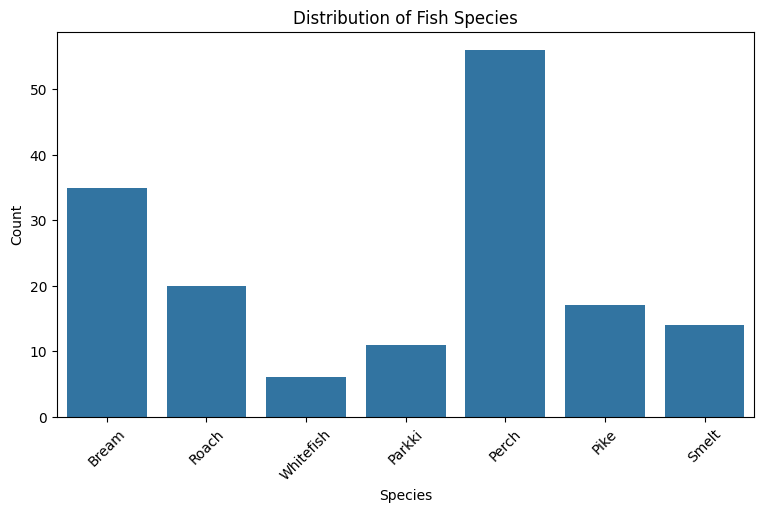

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the distribution of fish species
plt.figure(figsize=(9,5))
sns.countplot(x='Species', data=df)
plt.title('Distribution of Fish Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Boxplots for Each Feature by Species

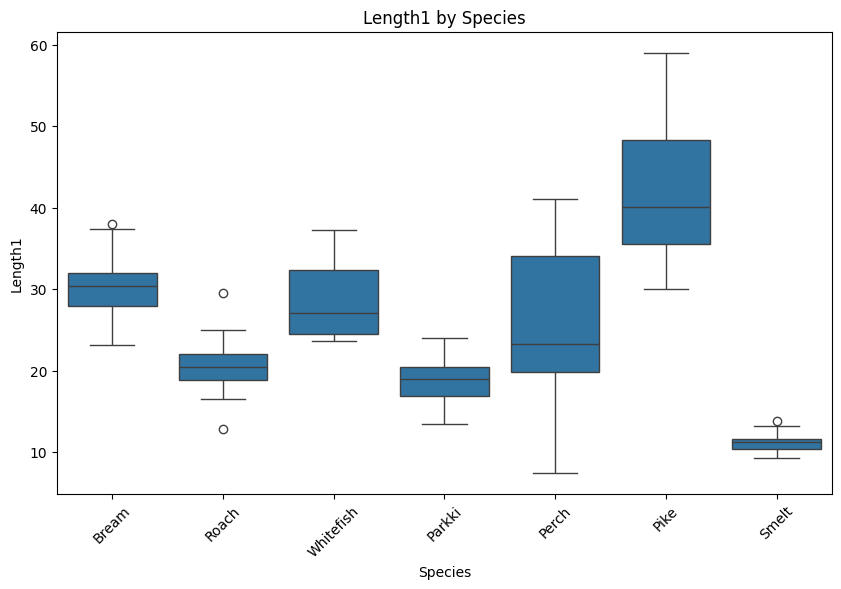

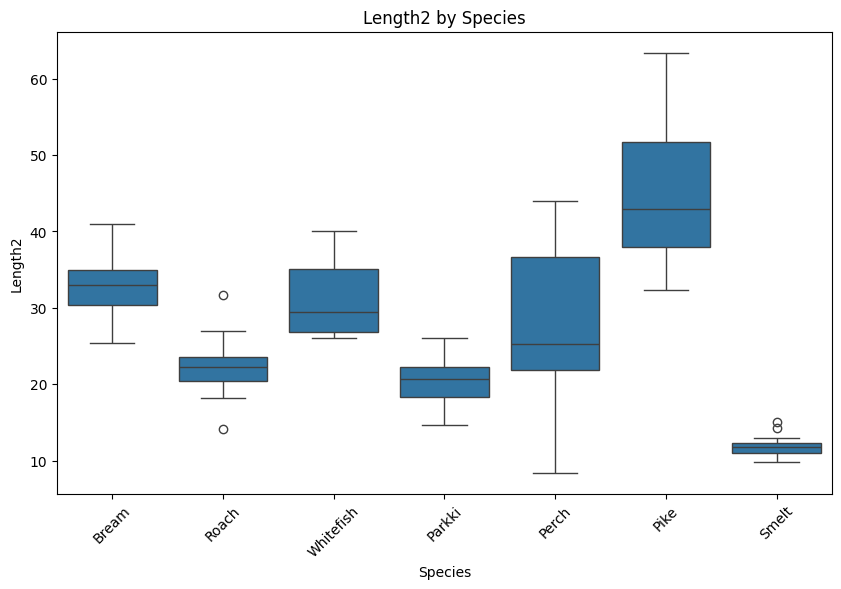

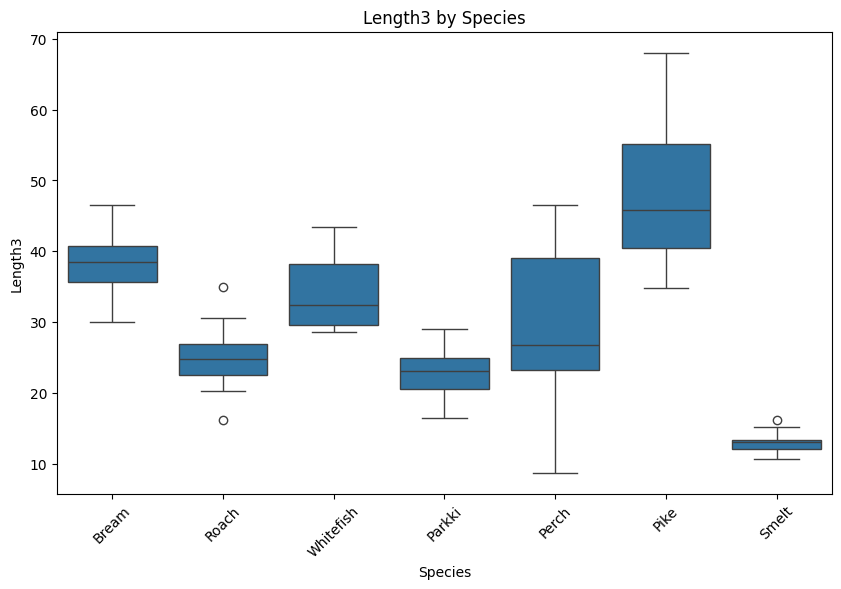

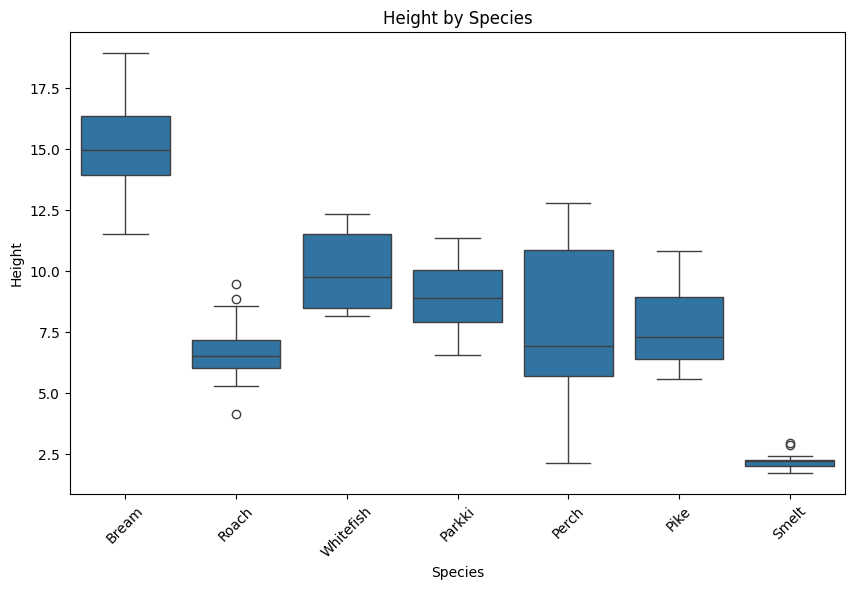

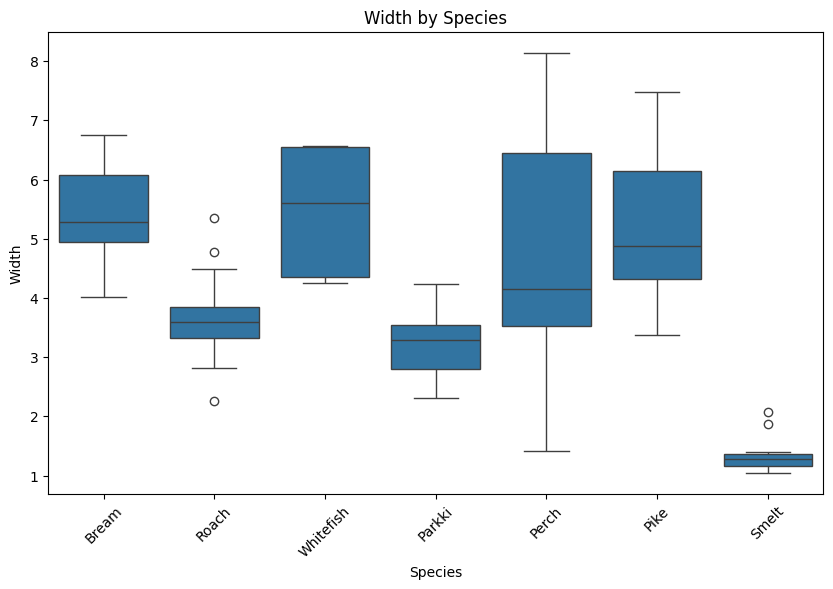

In [ ]:
# Boxplots to see feature distribution across species
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

Data Preprocessing

Separate Features and Target Variable

In [ ]:
# Features (independent variables)
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

# Target variable (dependent variable)
y = df['Species']

Label Encoding For Target Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(y)

# Display the encoded classes
print(f'Encoded Classes: {label_encoder.classes_}')
print(f'Encoded Labels: {y}')

Encoded Classes: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
Encoded Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


Split the Data into Trainig anf Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build and Evaluate Two Models

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

# Calculate evaluation metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')

print(f'Logistic Regression - Accuracy: {accuracy_log}')
print(f'Logistic Regression - F1 Score: {f1_log}')
print(f'Logistic Regression - Recall: {recall_log}')

# Classification report
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_,zero_division=0))

Logistic Regression - Accuracy: 0.875
Logistic Regression - F1 Score: 0.8238636363636364
Logistic Regression - Recall: 0.875
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



Hyperparameter Tuning for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs', 'liblinear']  # Optimization algorithm
}

# Use Stratified K-Folds
skf = StratifiedKFold(n_splits=5)

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Evaluate the best model
best_log_reg = grid_search.best_estimator_
y_pred_best_log = best_log_reg.predict(X_test)
accuracy_best_log = accuracy_score(y_test, y_pred_best_log)

print(f'Best Logistic Regression - Accuracy: {accuracy_best_log}')

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression - Accuracy: 0.90625


Build and Evaluate K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)  # Start with 5 neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

# Calculate evaluation metrics
accuracy_knn_reg = accuracy_score(y_test, y_pred_knn)  # Ensure y_pred_log is defined
f1_knn_reg = f1_score(y_test, y_pred_knn, average='weighted')
recall_knn_reg = recall_score(y_test, y_pred_knn, average='weighted')

print(f'KNN - Accuracy: {accuracy_knn_reg}')
print(f'KNN - F1 Score: {f1_knn_reg}')
print(f'KNN - Recall: {recall_knn_reg}')

# Classification report with zero_division parameter
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_, zero_division=0))

KNN - Accuracy: 0.875
KNN - F1 Score: 0.8395833333333333
KNN - Recall: 0.875
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.73      0.89      0.80         9
        Pike       1.00      1.00      1.00         3
       Roach       0.50      1.00      0.67         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.75      0.84      0.78        32
weighted avg       0.81      0.88      0.84        32



Hyperparameter Tuning for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 20),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

#Use Stratified K-Folds
skf = StratifiedKFold(n_splits=5)

# Perform grid search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search_knn.best_params_}')

# Evaluate the best model
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f'Best KNN - Accuracy: {accuracy_best_knn}')

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
Best KNN - Accuracy: 0.8125


Compare Both Models

Create a Comparison Table

In [ ]:
# Create a comparison table
performance = {
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [accuracy_log, accuracy_knn_reg],
    'F1 Score': [f1_log, f1_knn_reg],
    'Recall': [recall_log, recall_knn_reg]
}

performance_df = pd.DataFrame(performance)
print(performance_df)

                 Model  Accuracy  F1 Score  Recall
0  Logistic Regression     0.875  0.823864   0.875
1                  KNN     0.875  0.839583   0.875


Plot Model Accuracies

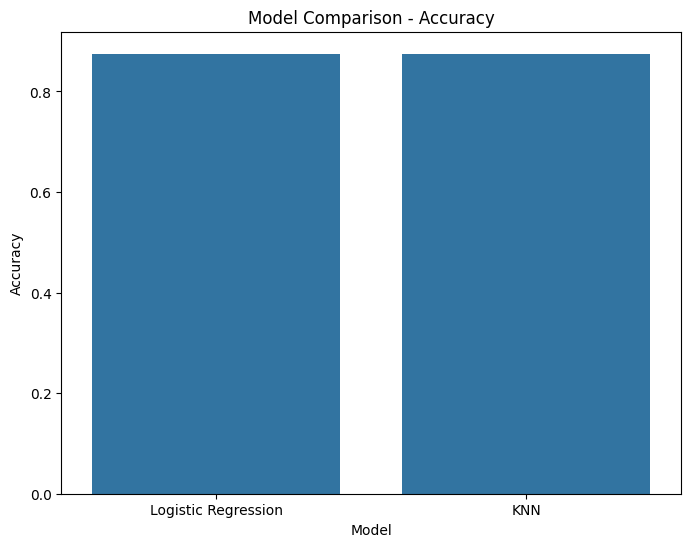

In [ ]:
# Plot model accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Feature Selection

Feature Importance for Logistic Regression

   Feature  Importance
3   Height   10.061837
2  Length3    7.945880
4    Width   -2.819319
1  Length2   -2.827385
0  Length1   -4.874842


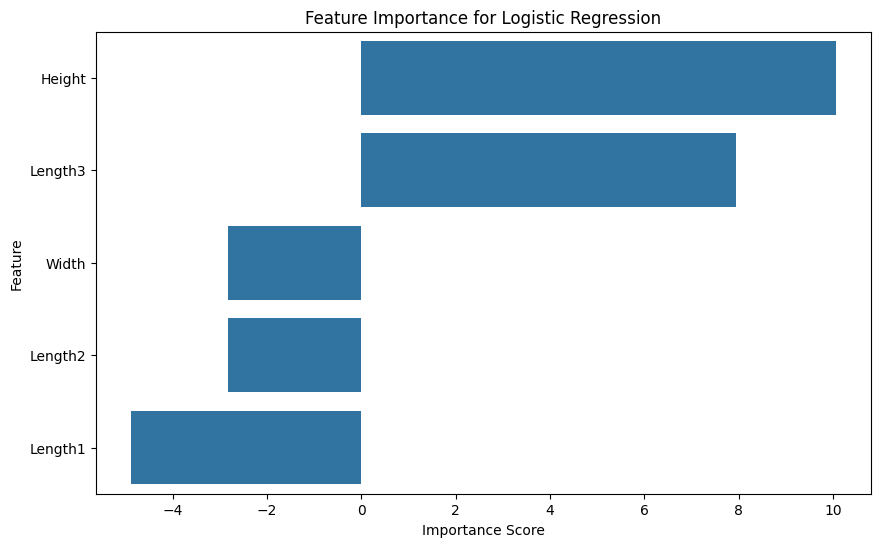

In [ ]:
# Logistic Regression coefficients
coef = best_log_reg.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coef[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Feature Importance for KNN

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Use a model with feature importance for RFE
rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = np.array(X.columns)[rfe.support_]
print(f'Selected Features: {selected_features}')

# Train KNN using the selected features
knn = KNeighborsClassifier()
knn.fit(X_train[:, rfe.support_], y_train)  # Select only relevant features

Selected Features: ['Length3' 'Height' 'Width']


KNeighborsClassifier()

Plot For Feature Importance

   Feature  Importance
1   Height    0.540625
0  Length1    0.287500
2    Width    0.262500


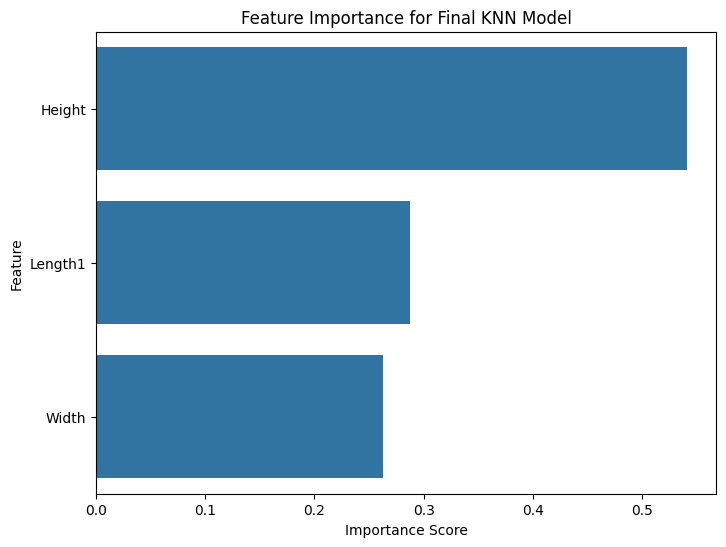

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(final_knn, X_test_selected, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': ['Length1', 'Height', 'Width'],
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Final KNN Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Final Model

In [ ]:
import pandas as pd

# Convert X_train and X_test back to DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Select important features
selected_features = ['Height', 'Length3', 'Width']

# Subset training and test data
X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

Build Final Model using KNN

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression using the best hyperparameters
final_log_reg = LogisticRegression(C=100, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
final_log_reg.fit(X_train_selected, y_train)

LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

Evaluate the Final Model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# Make predictions
y_pred_final_log = final_log_reg.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_final_log = accuracy_score(y_test, y_pred_final_log)
f1_final_log = f1_score(y_test, y_pred_final_log, average='weighted')
recall_final_log = recall_score(y_test, y_pred_final_log, average='weighted')

print(f'Final Logistic Regression - Accuracy: {accuracy_final_log}')
print(f'Final Logistic Regression - F1 Score: {f1_final_log}')
print(f'Final Logistic Regression - Recall: {recall_final_log}')

# Classification report
print(classification_report(y_test, y_pred_final_log, target_names=label_encoder.classes_, zero_division=0))


Final Logistic Regression - Accuracy: 0.875
Final Logistic Regression - F1 Score: 0.8238636363636364
Final Logistic Regression - Recall: 0.875
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



Compare Final Model and Initial Model

                         Model  Accuracy  F1 Score  Recall
0  Initial Logistic Regression     0.875  0.823864   0.875
1                  Initial KNN     0.875  0.839583   0.875
2    Final Logistic Regression     0.875  0.823864   0.875


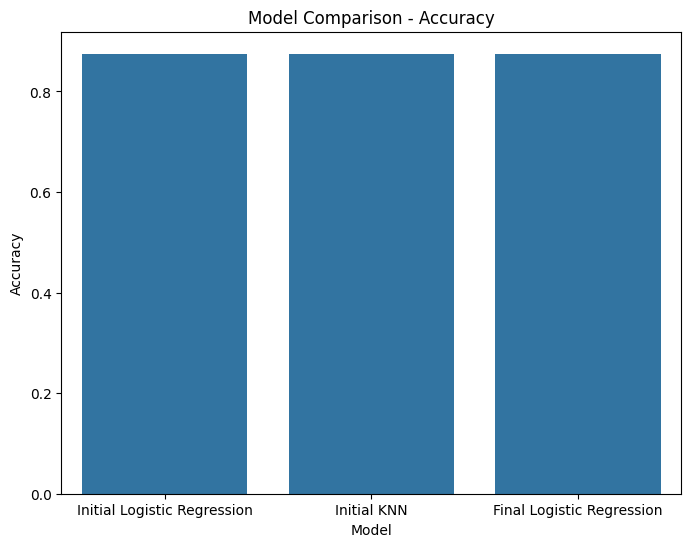

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a comparison table
performance = {
    'Model': ['Initial Logistic Regression', 'Initial KNN', 'Final Logistic Regression'],
    'Accuracy': [accuracy_log, accuracy_knn_reg, accuracy_final_log],
    'F1 Score': [f1_log, f1_knn_reg, f1_final_log],
    'Recall': [recall_log, recall_knn_reg, recall_final_log]
}

performance_df = pd.DataFrame(performance)
print(performance_df)

# Plot model accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()